<a href="https://colab.research.google.com/github/NaHyeon1Kim/Modeling/blob/main/%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC_%ED%95%98%EC%9D%B4%ED%8D%BC%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

성능 개선을 위한 최적 파라미터 값 찾기

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
#creditset.csv, default10yr가 target, loan, age, income이 X변수
credit = pd.read_csv("creditset.csv")
y = pd.get_dummies( credit.default10yr )
X = credit[ ["loan","age","income"] ]
dt = DecisionTreeClassifier()
dt.fit( X, y ) #modeling
dt.predict(X)

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

In [2]:
print('결정 트리의 현재 하이퍼 파라미터 : \n', dt.get_params())

결정 트리의 현재 하이퍼 파라미터 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [3]:
from sklearn.model_selection import GridSearchCV
#Grid Search : 모델의 하이퍼파라미터 최적화 위한 기법 중 하나
#다양한 하이퍼파라미터 값을 시도하여 모델 성능 평가
#최적의 하이퍼파라미터 조합 찾기

최적 파라미터 찾기 - 1

In [4]:
params = {
    'max_depth' : [ 6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy',
                       cv=5, return_train_score=True)
grid_cv.fit( X, y )
#scoring : 모델 성능 평가 지표
#cv : 교차 검증(Cross-Validation)의 폴드 수
#return_train_score : True로 설정시 교차 검증시 훈련 데이터 점수도 반환

#교차 검증을 하는 이유
# 1. 일반화 성능 평가 : 훈련 데이터와 별도의 검증 데이터에 대해 얼마나 잘 작동하는지 확인.
# 2. 하이퍼파라미터 튜닝 : 머신러닝은 하이퍼파라미터에 의존. 최적값 찾기.
# 3. 데이터 품질 확인 : 폴드를 나누기 때문에 훈련에 사용되지 않은 데이터로 검증 수행, 이상치 파악.

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [5]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','mean_test_score','mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.9840,0.99625
1,8,0.9850,1.00000
2,10,0.9845,1.00000
3,12,0.9850,1.00000
4,16,0.9840,1.00000
5,20,0.9840,1.00000
6,24,0.9835,1.00000


최적 파라미터 찾기-2

In [6]:
params = {
    'max_depth' : [ 8, 16, 20 ],
    'min_samples_split' : [ 8, 16, 24 ]
}

grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy',
                       cv=5, return_train_score=True)
grid_cv.fit( X, y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

In [7]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','mean_test_score','mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,8,0.9825,0.994750
1,8,0.9785,0.991625
2,8,0.9770,0.988250
3,16,0.9825,0.994750
4,16,0.9785,0.991625
5,16,0.9770,0.988250
6,20,0.9825,0.994750
7,20,0.9785,0.991625
8,20,0.9770,0.988250


중요 피처 확인하기

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#특성이 얼마나 중요한지, 중요도 = 예측 수행 기여도
#중요도는 0~1 사이, 값이 클수록 해당 특성이 예측에 큰 영향
feature_importance_values = dt.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index=X.columns)
feature_importance_values_s

loan      0.477366
age       0.278966
income    0.243668
dtype: float64

In [21]:
feature_top3 = feature_importance_values_s.sort_values(ascending=False)[:3]
feature_top3

loan      0.477366
age       0.278966
income    0.243668
dtype: float64

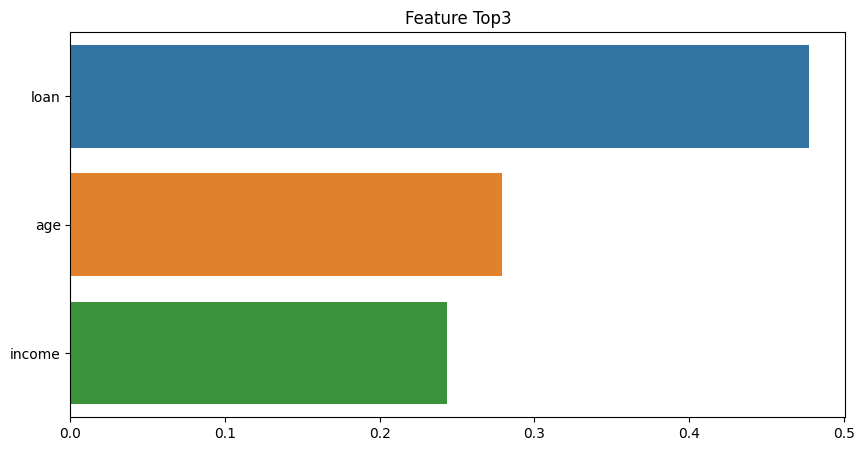

In [24]:
plt.figure(figsize = (10, 5))
plt.title('Feature Top3')
sns.barplot(x=feature_top3, y=feature_top3.index)
plt.show()